<a href="https://colab.research.google.com/github/artnovob/Scraper_Sentiment/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests

In [ ]:
API_KEY="4c043d21-d53e-4a99-a6f3-1a08745b7575"

In [ ]:
url="https://content.guardianapis.com/world/narendra-modi?from-date=2024-01-01&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575&type=article&page=1"

In [ ]:
urllist=[]

In [ ]:
for i in range(1,11):
  a="https://content.guardianapis.com/world/narendra-modi?from-date=2024-01-01&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575&type=article&page="
  b=str(i)
  c=a+b
  urllist.append(c)

In [ ]:
urllist

['https://content.guardianapis.com/world/narendra-modi?from-date=2024-01-01&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575&type=article&page=1',
 'https://content.guardianapis.com/world/narendra-modi?from-date=2024-01-01&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575&type=article&page=2',
 'https://content.guardianapis.com/world/narendra-modi?from-date=2024-01-01&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575&type=article&page=3',
 'https://content.guardianapis.com/world/narendra-modi?from-date=2024-01-01&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575&type=article&page=4',
 'https://content.guardianapis.com/world/narendra-modi?from-date=2024-01-01&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575&type=article&page=5',
 'https://content.guardianapis.com/world/narendra-modi?from-date=2024-01-01&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575&type=article&page=6',
 'https://content.guardianapis.com/world/narendra-modi?from-date=2024-01-01&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575&type=article&page=7',

In [ ]:
info=[]
def json(url1):
    response=requests.get(url1)
    x=response.json()
    info.append(x)

output=[json(url1) for url1 in urllist]
info[8]['response']['results'][8]['webTitle']
"'We are worried': Indians hopeful but anxious as vaccination drive begins"
finallist=[]
try:
    for k in range(0,10):
        for j in range(0,9):
            value=dict(webtitle=info[k]['response']['results'][j]['webTitle'],
        sectionname=info[k]['response']['results'][j]['sectionName'],
        publisheddate=info[k]['response']['results'][j]['webPublicationDate'])
            finallist.append(value)
except IndexError:
    print("done")

done


In [ ]:
datanew=pd.DataFrame(finallist)
datanew

,webtitle,sectionname,publisheddate
0,US journalist sues Indian government after los...,World news,2025-03-13T18:15:09Z
1,The Guardian view on Modi redrawing India’s el...,Opinion,2025-03-09T17:30:07Z
2,Could Elon Musk’s newfound political influence...,World news,2025-03-07T10:16:02Z
3,UK ministers head to India in search of trade ...,World news,2025-02-23T22:30:47Z
4,‘There has been an awakening’: ancient sects o...,World news,2025-02-16T09:00:05Z
...,...,...,...
77,India confronts Google over Gemini AI tool’s ‘...,World news,2024-02-26T09:42:29Z
78,The Guardian view on Modi in Ayodhya: an alarm...,Opinion,2024-01-22T18:42:19Z
79,"As petals rained down and celebrities beamed, ...",Opinion,2024-01-22T14:18:35Z
80,Modi inaugurates Hindu temple on site of razed...,World news,2024-01-22T08:17:14Z


In [ ]:
from textblob import TextBlob


def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity


datanew["sentiment"] = datanew["webtitle"].apply(get_sentiment)


datanew


,webtitle,sectionname,publisheddate,sentiment
0,US journalist sues Indian government after los...,World news,2025-03-13T18:15:09Z,0.000000
1,The Guardian view on Modi redrawing India’s el...,Opinion,2025-03-09T17:30:07Z,-0.600000
2,Could Elon Musk’s newfound political influence...,World news,2025-03-07T10:16:02Z,0.000000
3,UK ministers head to India in search of trade ...,World news,2025-02-23T22:30:47Z,0.000000
4,‘There has been an awakening’: ancient sects o...,World news,2025-02-16T09:00:05Z,0.000000
...,...,...,...,...
77,India confronts Google over Gemini AI tool’s ‘...,World news,2024-02-26T09:42:29Z,0.000000
78,The Guardian view on Modi in Ayodhya: an alarm...,Opinion,2024-01-22T18:42:19Z,0.018182
79,"As petals rained down and celebrities beamed, ...",Opinion,2024-01-22T14:18:35Z,-0.155556
80,Modi inaugurates Hindu temple on site of razed...,World news,2024-01-22T08:17:14Z,0.000000


In [ ]:
import numpy as np

datanew['Sentiment Class']  = np.where(datanew['sentiment']<0,"negative",
                                  np.where(datanew['sentiment']>0,"positive",
                                           "neutral"))
datanew

,webtitle,sectionname,publisheddate,sentiment,Sentiment Class
0,US journalist sues Indian government after los...,World news,2025-03-13T18:15:09Z,0.000000,neutral
1,The Guardian view on Modi redrawing India’s el...,Opinion,2025-03-09T17:30:07Z,-0.600000,negative
2,Could Elon Musk’s newfound political influence...,World news,2025-03-07T10:16:02Z,0.000000,neutral
3,UK ministers head to India in search of trade ...,World news,2025-02-23T22:30:47Z,0.000000,neutral
4,‘There has been an awakening’: ancient sects o...,World news,2025-02-16T09:00:05Z,0.000000,neutral
...,...,...,...,...,...
77,India confronts Google over Gemini AI tool’s ‘...,World news,2024-02-26T09:42:29Z,0.000000,neutral
78,The Guardian view on Modi in Ayodhya: an alarm...,Opinion,2024-01-22T18:42:19Z,0.018182,positive
79,"As petals rained down and celebrities beamed, ...",Opinion,2024-01-22T14:18:35Z,-0.155556,negative
80,Modi inaugurates Hindu temple on site of razed...,World news,2024-01-22T08:17:14Z,0.000000,neutral


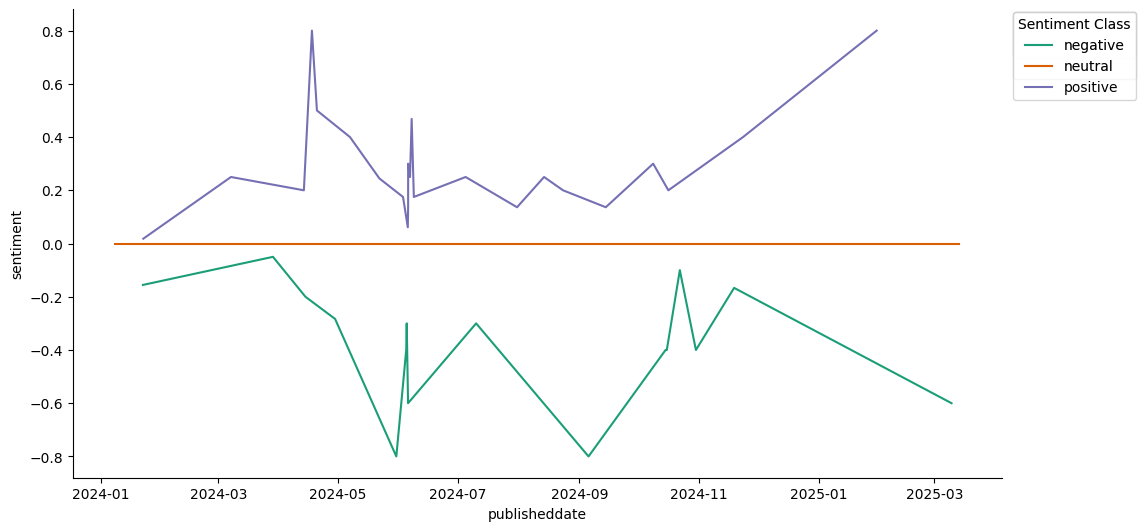

In [ ]:


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['publisheddate']
  ys = series['sentiment']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

df_sorted = datanew.sort_values('publisheddate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sentiment Class')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sentiment Class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('publisheddate')
_ = plt.ylabel('sentiment')

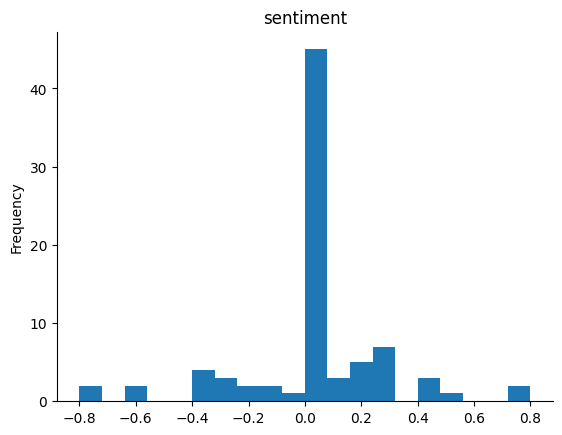

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
datanew['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)